<b>Google Colab</b> <a href="https://colab.research.google.com/github/kirillzyusko/deeplearning/blob/master/4/lab.ipynb">link</a>

# **Part 1-1: Download and extract SVNH dataset**

Publication: https://arxiv.org/abs/1312.6082

In [0]:
!wget "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
!wget "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"
!wget "http://ufldl.stanford.edu/housenumbers/extra_32x32.mat"

In [0]:
!wget "http://ufldl.stanford.edu/housenumbers/train.tar.gz"
!wget "http://ufldl.stanford.edu/housenumbers/test.tar.gz"
!wget "http://ufldl.stanford.edu/housenumbers/extra.tar.gz"

Extract .zip

In [0]:
!mkdir train
!mkdir test
!mkdir extra
!tar xvzf train.tar.gz -C train
!tar xvzf test.tar.gz -C test
!tar xvzf extra.tar.gz -C extra

In [29]:
%ls

extra/           initial.h5    test_32x32.mat  train_32x32.mat
extra_32x32.mat  sample_data/  test.tar.gz     train.tar.gz
extra.tar.gz     test/         train/


Read data:

In [0]:
from scipy.io import loadmat

train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')
extra = loadmat('test_32x32.mat')

X_train = train['X']
y_train = train['y']
X_test = test['X']
y_test = test['y']

Check the data:

In [7]:
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (32, 32, 3, 73257)
y_train.shape:  (73257, 1)
X_test.shape:  (32, 32, 3, 26032)
y_test.shape:  (26032, 1)


Since we now know the structure of the data, we can visulize it:

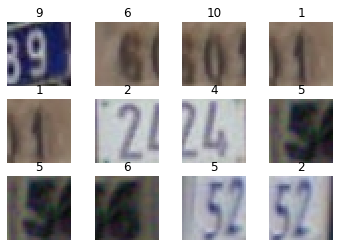

In [8]:
import matplotlib.pyplot as plt

X_train = X_train[:,:,:,:]
X_test = X_test[:,:,:,:]

start = 50

fig, ax = plt.subplots(3, 4)
for row in range(3):
    for col in range(4):
        ax[row, col].imshow(X_train[:,:,:,start+row*3+col])
        ax[row, col].axis('off')
        ax[row, col].set_title('{}'.format(y_train[start+row*3+col, 0]))
plt.show()

# **Part 1-2: Download and extract MNIST dataset**

In [0]:
from keras.datasets import mnist


# the data, split between train and test sets
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

x_train_mnist = x_train_mnist / 255
y_train_mnist = y_train_mnist / 255
x_test_mnist = x_test_mnist / 255
y_test_mnist = y_test_mnist / 255

# **Part 1-3: Build a NN model**

Const declaration

In [0]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_CHANNELS=3

NN model

In [24]:
from keras import Input, Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

# input layer
input = Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS), name="input")

# 1 layer
hidden1 = Conv2D(32, (3,3), activation='relu')(input)
hidden1 = BatchNormalization()(hidden1)
hidden1 = MaxPooling2D(padding='same')(hidden1)
hidden1 = Dropout(0.25)(hidden1)

# 2 layer
hidden2 = Conv2D(64, (3,3), activation='relu')(hidden1)
hidden2 = BatchNormalization()(hidden2)
hidden2 = MaxPooling2D(padding='same',strides=1)(hidden2)
hidden2 = Dropout(0.25)(hidden2)

# 3 layer
hidden3 = Conv2D(128, (3,3), activation='relu')(hidden2)
hidden3 = BatchNormalization()(hidden3)
hidden3 = MaxPooling2D(padding='same')(hidden3)
hidden3 = Dropout(0.25)(hidden3)

# 4 layer
hidden4 = Conv2D(192, (3,3), activation='relu')(hidden3)
hidden4 = BatchNormalization()(hidden4)
hidden4 = MaxPooling2D(padding='same',strides=1)(hidden4)
hidden4 = Dropout(0.25)(hidden4)

# 5 layer
hidden5 = Conv2D(192, (3,3), activation='relu')(hidden4)
hidden5 = BatchNormalization()(hidden5)
hidden5 = MaxPooling2D(padding="same")(hidden5)
hidden5 = Dropout(0.25)(hidden5)

# 6 layer
hidden6 = Conv2D(192, (3,3), activation='relu')(hidden5)
hidden6 = BatchNormalization()(hidden6)
hidden6 = MaxPooling2D(padding='same',strides=1)(hidden6)
hidden6 = Dropout(0.25)(hidden6)

# 7 layer
hidden7 = Conv2D(192, (3,3), activation='relu')(hidden6)
hidden7 = BatchNormalization()(hidden7)
hidden7 = MaxPooling2D(padding='same')(hidden7)
hidden7 = Dropout(0.25)(hidden7)

# 8 layer
hidden8 = Conv2D(192, (3,3), activation='relu')(hidden7)
hidden8 = BatchNormalization()(hidden8)
hidden8 = MaxPooling2D(padding='same',strides=1)(hidden8)
hidden8 = Dropout(0.25)(hidden8)

# flatten layer
flatten = Flatten()(hidden8)

# 1 dense layer
dense1 = Dense(4096, activation='relu')(flatten)

# 2 dense layer
dense2 = Dense(4096, activation='relu')(dense1)

# output layers
length = Dense(6, activation='softmax', name='length')(dense2)
digit1 = Dense(11, activation='softmax', name='digit1')(dense2)
digit2 = Dense(11, activation='softmax', name='digit2')(dense2)
digit3 = Dense(11, activation='softmax', name='digit3')(dense2)
digit4 = Dense(11, activation='softmax', name='digit4')(dense2)
digit5 = Dense(11, activation='softmax', name='digit5')(dense2)

model = Model(inputs=input, outputs=[length,digit1,digit2,digit3,digit4,digit5])

model.summary()

# use sparse, since it allows not use one-hot encoding
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

model.save_weights('initial.h5')

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 126, 126, 32) 896         input[0][0]                      
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 126, 126, 32) 128         conv2d_23[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_22 (MaxPooling2D) (None, 63, 63, 32)   0           batch_normalization_22[0][0]     
____________________________________________________________________________________________

# **Part 1: Train on mnist dataset**

# **Part 2: Train on svnh dataset**

In [33]:
import h5py

a = h5py.File('train/train/digitStruct.mat',"r")['digitStruct']['name']

print(a)

<HDF5 dataset "name": shape (33402, 1), type "|O">


Image generator:

In [0]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
  rescale=1./255
)

# **Part 3: ?**

# **Part 4: Export model to tensorflow lite**

Convert model to tensorflow lite, in order to use it on weak devices:

In [0]:
from tensorflow.contrib import lite

converter = lite.TFLiteConverter.from_keras_model_file('initial.h5')
tfmodel = converter.convert()

open("model.tflite","wb").write(tfmodel)

# **Afterward. Test result**

Write here about my results. Attach various screenshots.

# **Resources**

- Publication from youtube link: https://arxiv.org/abs/1312.6082
- https://github.com/penny4860/Yolo-digit-detector
- https://github.com/dyckia/SVHN-CNN/blob/master/SVHN.ipynb